# Waterfilling Levels

In [1]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions\\food_bank_functions.py'>

In [2]:
np.random.seed(1)

### Generating Distribution

In [3]:
lam = 10
num_bins = 26
samples = np.random.poisson(lam,100000)

In [4]:
print(samples)
min_samples = np.floor(min(samples))
max_samples = np.ceil(max(samples))
print(min_samples, max_samples)

[ 9  6  7 ... 11 10 11]
0.0 26.0


In [5]:
bins = np.digitize(samples, np.arange(min_samples+1, max_samples+1))
support = np.arange(min_samples+1, max_samples+1)
support = np.append(support, max(samples))
print(support)
vals = np.zeros(len(support))

for i in bins:
    vals[i] += 1
vals = vals / np.sum(vals)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


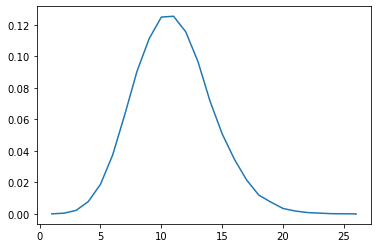

In [6]:
plt.plot(support, vals)

### Plotting the distribution

In [7]:
var = variance(support, vals)
med = median(support, vals)
print(med)
print(var)

11.0
9.948687001600003


In [8]:
print(vals)
print(support)
vals[0] = vals[0] + (1 - np.sum(vals))

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


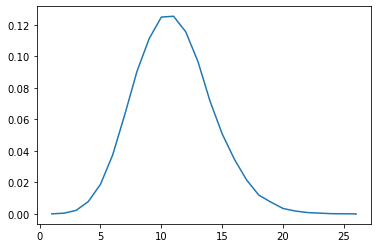

In [9]:
plt.plot(support, vals)

### Test

In [10]:
n = 6
sorted_distribution = support
weights = vals
expected_demand = np.dot(vals, support)
print(expected_demand)
max_budget = n * expected_demand

10.99272


In [11]:
print(max_budget)

65.95632


In [12]:
np.sum(vals)

1.0

In [13]:
group_demands = np.random.choice(size=n, a=sorted_distribution, p=vals)
print(group_demands)

[11.  6.  9.  8. 16. 13.]


In [14]:
print(waterfilling_waste(group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [15]:
print(greedy(group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [16]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[10.99272  6.       9.       8.      10.99272 10.99272]


In [17]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[10.99272  6.       9.       8.      15.9818  13.     ]


In [18]:
print(waterfilling_et_waste([expected_demand for x in range(n)],group_demands,max_budget))

[10.99272  6.       9.       8.      16.      13.     ]


In [19]:
print(waterfilling_et_full_waste([expected_demand for x in range(n)],group_demands,max_budget))

[10.99272  6.       9.       8.      16.      13.     ]


In [20]:
print(waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [21]:
print(weights)
print(sorted_distribution)

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


In [22]:
print(waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, max_budget))

[11.  6.  9.  8. 16. 13.]


In [23]:
print(max_min_heuristic(group_demands, [med for x in range(n)], [expected_demand for x in range(n)], [var for x in range(n)], max_budget))

[10.99272     5.99602909  8.99404364  7.99470545 15.98941091 13.        ]


# Experiments

## Varying Number of Groups

### Look at scaling with n

In [24]:
max_n = 100
num_iterations = 1000
print(weights)
print(sorted_distribution)

[7.0000e-05 4.7000e-04 2.2600e-03 7.8500e-03 1.8810e-02 3.7430e-02
 6.3200e-02 9.0580e-02 1.1131e-01 1.2498e-01 1.2551e-01 1.1566e-01
 9.6870e-02 7.1540e-02 5.0760e-02 3.4680e-02 2.1590e-02 1.1980e-02
 7.4900e-03 3.4400e-03 1.8600e-03 8.7000e-04 5.1000e-04 1.5000e-04
 1.0000e-04 2.0000e-05 1.0000e-05]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 26.]


In [25]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 1000
for i in np.arange(2,max_n+1):
    for _ in range(num_iterations):
        budget = i * 15.
        demands = np.random.choice(size=i, a=support, p=vals)
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[ 0.          0.         12.628      13.7985     14.27216667 14.587
 15.097      15.496      15.757      15.842      16.135      16.341
 16.341      16.541      16.667      16.782      16.917      16.983
 17.2        17.239      17.313      17.326      17.518      17.512
 17.616      17.75       17.723      17.727      17.982      17.9
 17.89       17.949      18.093      18.076      18.244      18.195
 18.154      18.276      18.437      18.288      18.319      18.444
 18.527      18.507      18.582      18.621      18.622      18.649
 18.632      18.704      18.674      18.757      18.781      18.811
 18.879      18.885      18.892      18.955      18.868      19.013
 18.989      19.031      18.982      19.154      19.162      19.093
 19.194      19.225      19.195      19.23       19.258      19.345
 19.31       19.283      19.394      19.337      19.425      19.363
 19.429      19.439      19.379      19.488      19.483      19.451
 19.456      19.524      19.576      19.479      1

In [26]:
data_dict = {'NumGroups':[], 'Norm':[], 'ET_Online':[],'Hope_Online':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'ET_Full':[], 'Hope_Full':[], 'Max_Min':[]}
num_iterations = 1000
for n in np.arange(2,max_n+1,1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + np.dot(weights, sorted_distribution)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    budget = n*expected_demand
    print(n)
    for i in range(num_iterations):
        data_dict['NumGroups'].append(n)

        
        group_demands = np.random.choice(size=n, a=support, p=vals)
        opt = waterfilling_waste(group_demands,budget)
        
        hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
        hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
        dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
        et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
        
        
        
        data_dict['Norm'].append('L1')
        data_dict['Hope_Online'].append(np.sum(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.sum(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.sum(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))
        
        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Hope_Online'].append(np.max(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.max(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.max(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [27]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [28]:
df.to_csv('scale_with_n.csv')

In [29]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [30]:
df.head

<bound method NDFrame.head of          NumGroups  Norm   variable       value
0                2    L1  ET_Online    0.000000
1                2  Linf  ET_Online    0.000000
2                2    L1  ET_Online    0.000000
3                2  Linf  ET_Online    0.000000
4                2    L1  ET_Online    0.007280
...            ...   ...        ...         ...
1781995        100  Linf    Max_Min    2.036263
1781996        100    L1    Max_Min  157.732140
1781997        100  Linf    Max_Min    3.035345
1781998        100    L1    Max_Min  148.223361
1781999        100  Linf    Max_Min    2.510153

[1782000 rows x 4 columns]>

<AxesSubplot:title={'center':'Gaussian L1'}, xlabel='NumGroups', ylabel='value'>

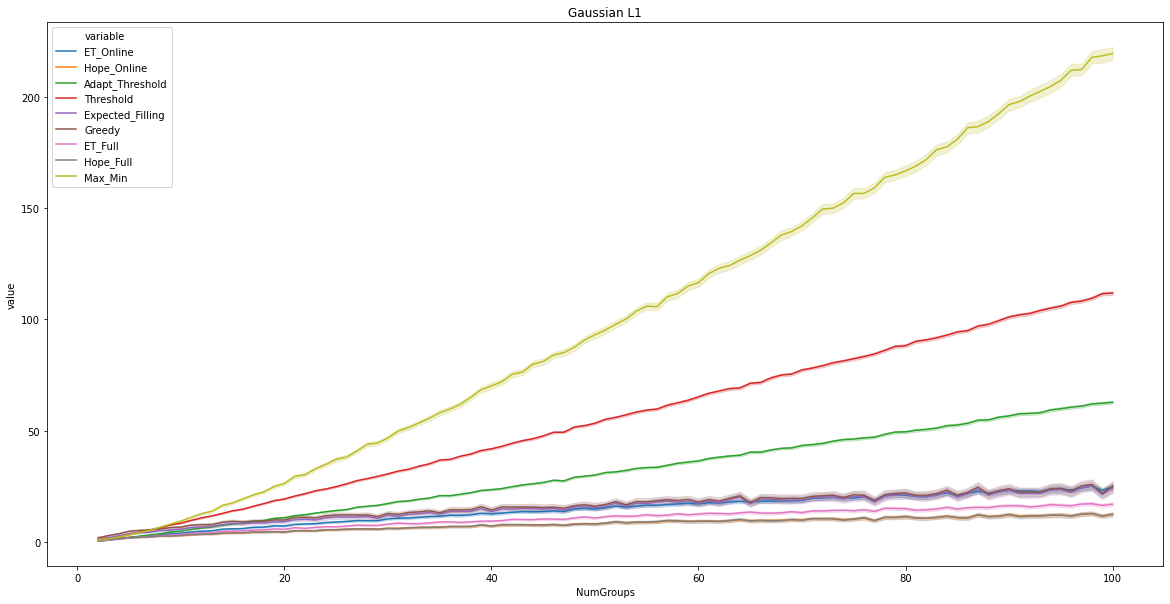

In [31]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

<AxesSubplot:title={'center':'Gaussian Linf'}, xlabel='NumGroups', ylabel='value'>

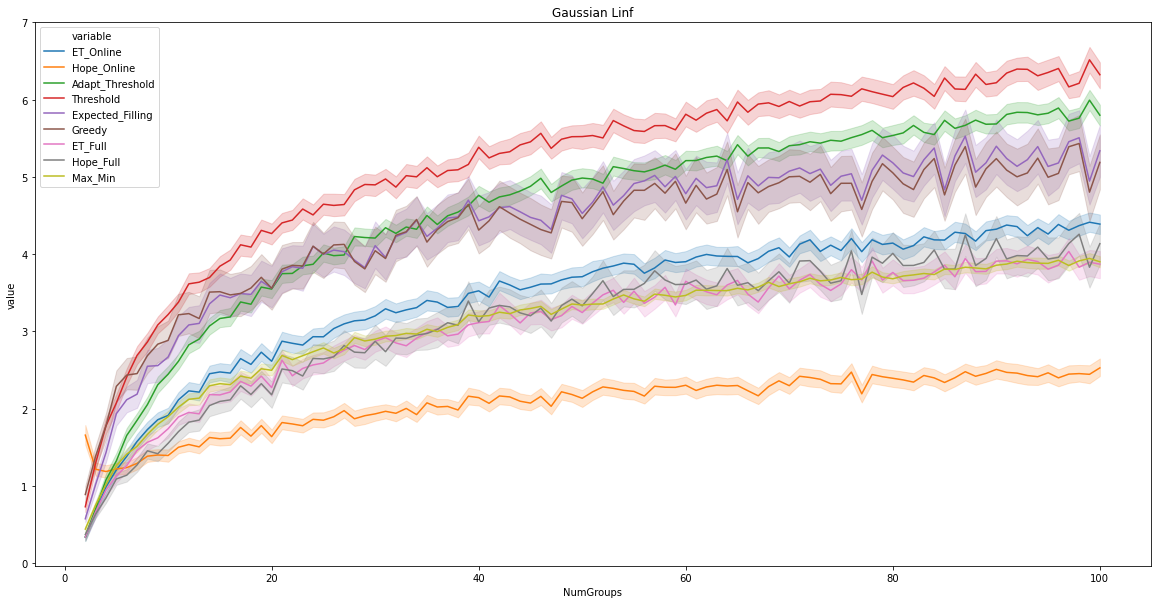

In [32]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Gaussian Linf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [34]:
sorted_support = sorted_distribution

In [35]:
data_dict = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[]}
num_iterations = 1000


for i in range(num_iterations):
    max_n = 100
    
    expected_demands = [expected_demand for x in range(max_n)]
    median_demands = [med for _ in range(max_n)]
    variance = [var for _ in range(max_n)]
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*expected_demand
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    et_full = np.copy(expected_demands)
    et_online = np.sort(np.copy(expected_demands))
    
    et_online_budget = max_budget
    hope_online_budget = max_budget

    hope_online_support = np.copy(sorted_support)
    hope_online_vals = np.copy(weights)*max_n
    
    hope_full_support = np.copy(sorted_support)
    hope_full_vals = np.copy(weights)*max_n
    print('start')
    print(hope_full_vals)
    print(np.sum(hope_full_vals))
    max_min_budget = max_budget
    min_fill = 1
    
    for n in range(max_n):
        # Solve for the various waterfilling levels
        data_dict['Group'].append(n)
        
        # Adds on the true waterfilling level
        data_dict['True'].append(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
        
        
        # et_Full
        
        # Replaces current town's demand with realized demand
        et_full[n] = group_demands[n]
        # Sorts demands
        et_full_sorted = np.sort(np.copy(et_full))
        # Appends maximum allocation based on full demand with full budget
        data_dict['ET_Full'].append(max(waterfilling_sorted(et_full_sorted, max_budget)))
            
            
        # et_Online
        
        # Removes expected demand for current agent from list
        et_online = delete_sorted(et_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(et_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, et_online_budget)
        data_dict['ET_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        et_online_budget -= min(tmp_sol[index], et_online_budget, group_demands[n])
        
        
        # hope_Full
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(hope_full_support - obs_demand))
        hope_full_vals -= weights
        hope_full_vals[index] += 1
        
        data_dict['Hope_Full'].append(max(waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)))
        
        
#         if n == max_n - 1:
#             print(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
#             print(max(waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)))
#             print(hope_full_vals)
        
        # hope_Online
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(hope_online_support - obs_demand))
        hope_online_vals -= weights
        hope_online_vals[index] += 1        
        
        
        tmp_sol = waterfilling_sorted_weights(hope_online_support, hope_online_vals, hope_online_budget)
        hope_online_budget -= min(obs_demand, hope_online_budget, tmp_sol[index])
        
        hope_online_vals[index] -= 1
        data_dict['Hope_Online'].append(max(tmp_sol))
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min'].append(min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation


Demands for experiment:[ 7. 12. 10. 14. 11.  8. 14.  9. 17. 10. 13. 13. 14.  8. 16. 12.  9. 13.
 11. 12. 11. 11.  7. 12. 12. 16. 11. 10.  9.  9.  8. 15. 16.  9. 12. 10.
 10.  5. 14.  9. 12. 11.  6. 13.  9. 14.  7. 13. 15. 14.  6. 14.  6.  7.
 13. 12. 11. 12.  9. 12. 14.  7. 14.  9. 19. 14.  8.  8. 12. 13. 15. 14.
  7. 12.  9. 14. 15. 15.  9. 12.  9. 10. 14. 11.  8. 12.  8.  8. 10.  5.
  6. 12. 13. 16. 13.  9.  7. 14.  7. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 13. 13. 10.  6. 16. 16.  7. 12.  5. 17. 13. 12. 11. 14. 12.  8.  8.
  6. 17. 10. 18.  6. 10.  7. 11.  5. 13. 21. 15. 10. 15.  7. 12.  7. 14.
 12.  9.  4. 17. 12.  9.  6.  7.  8. 14. 20. 14. 10. 10. 12.  3.  6. 14.
  8.  5. 21. 

  7.  4.  5.  8. 15. 13.  9.  9.  7. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 17. 17. 10. 10.  5. 18.  8. 11.  7.  5.  6.  9. 11. 16. 16.  6.  9.
 11. 14.  9. 10. 12. 11. 10.  7. 14.  5.  8. 15. 10.  4. 10. 16.  5. 12.
  8. 12. 16. 16.  7.  9. 15. 10.  8. 12. 16.  8.  9.  9. 18. 11.  8. 14.
 11. 13.  9. 13.  9. 14.  8. 10. 16.  9.  7.  9.  9. 11. 14. 15. 10.  6.
 12. 17. 12. 12.  8. 13. 13. 11. 15. 11. 11. 11. 15. 11. 14. 14.  7.  8.
 12. 13. 14. 10. 13. 10.  7. 12.  8. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[ 6. 14. 14. 13. 10.  8.  9. 10. 10. 12. 11.  3. 12.  2. 12.  5. 13. 10.
 13. 13. 15. 15. 15.  9. 13.  9. 14. 11. 10. 10. 18. 11.  9. 10. 12.  8.
 13. 11. 13. 11. 11. 11.  8. 12. 16.  8. 10. 13.  6.  7. 14.  9. 12.  9.
 12. 11. 13. 11. 10.  7. 12. 12. 10. 14. 10. 10. 12. 14. 18.  8.  7. 13.
 13.  9. 13. 15.  9. 10. 13. 12. 10.  9. 11. 14. 17.  9. 11.  7. 14. 14.
 18.  6. 12.  8.  9. 12. 11. 11. 13. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 14. 14. 15. 15. 11.  8.  8.  9. 10.  8.  7.  9.  9. 15. 10. 16. 11.
 12. 10.  8.  7. 15.  7. 16.  9.  9. 10.  9. 11. 14.  6. 15. 16. 13. 11.
  9. 14. 13.  7.  7. 10. 10. 11. 12. 15.  8. 13. 10. 13. 16. 12.  5. 17.
 14. 13. 15. 

 14. 10. 13.  6. 18.  9. 12. 15.  6. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12. 11. 17. 10. 15. 13. 19. 11.  8. 18. 17. 11.  4. 12.  8.  8. 11.  7.
  8.  6. 12. 16. 13.  9. 11. 16. 11. 10. 13.  7. 15. 11.  9. 12. 12. 15.
  9. 14.  9. 16. 12. 12. 13.  9.  9. 15. 10. 11. 14. 12. 14. 16.  9. 17.
 11. 13.  7. 10. 10. 14. 13. 18. 13. 12. 12. 11. 10. 12. 13. 15.  8.  8.
  5.  8. 10. 15. 13. 10.  8.  4. 12.  8. 15. 14. 14.  9. 11. 16. 10. 10.
 18.  4. 15. 11. 12. 15. 12. 10. 15.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 15. 10.  8. 15. 13.  8. 10.  7.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[14. 10.  9. 15. 11. 10.  9.  9.  9.  5. 13.  9.  9. 12. 13. 14. 12.  9.
 10. 10. 10. 13.  9. 10.  9.  8.  7. 13.  9.  7.  9.  8. 12. 13. 14. 11.
 14. 15. 10. 14.  9. 11. 12. 11.  8. 12. 14. 12.  8. 12. 12. 15.  9. 11.
  9. 10.  7. 10.  7. 10.  9. 11. 15. 14. 11.  7.  9. 17. 11. 12.  8. 17.
  9.  9.  8. 17. 16. 13.  6. 10.  7. 11. 10.  9. 11. 14. 12. 17. 10. 11.
 15. 12. 14. 14. 14.  9. 18.  8. 11.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 16. 14.  8. 10.  8.  8. 10. 14. 12. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[14. 11.  6. 11. 11. 16.  8. 13.  8. 18. 10. 11. 12. 12. 13.  9. 13. 12.
 16.  9.  8. 11.  7.  5. 12.  7. 10.  7. 15. 13. 13. 12. 11. 10.  7. 14.
 15. 15. 13.  7.  7. 11. 11. 12. 17. 12. 22.  8.  7.  8. 16. 13. 10. 13.
 12. 10. 13. 10. 10. 11. 12. 11. 11. 10. 10.  9. 20. 15.  4. 10. 11. 12.
 10.  8.  9.  9. 15. 11. 13.  7.  6. 10. 11. 10. 17.  7.  9.  8. 10. 10.
 12.  8.  7.  9. 13.  9. 10.  9. 10. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  7. 11. 13. 11. 10. 15. 16. 10.  9.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12. 12.  8. 10.  9.  7.  9.  8. 11. 14. 20.  8.  8. 10.  8. 14. 12. 12.
 12. 11. 13. 10. 14. 11.  7. 12. 13.  8.  7. 10. 13. 16. 19.  6.  7.  8.
 10. 13. 13.  7.  7. 12. 14. 14. 11.  5. 14. 11. 13. 11.  9. 13. 11. 10.
  6. 14.  7.  8.  8.  8. 10. 14. 13. 10.  9. 10. 11. 13.  9.  8. 11.  8.
 10. 15. 11. 10.  9. 11.  7. 14.  8. 16. 12. 15. 13.  9.  6. 13.  9. 11.
 16. 14. 12. 12. 10.  8.  9.  6. 12. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  9. 10.  8. 11.  8.  8. 11. 13.  6. 17.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7.  9. 13.  5. 10. 11. 12. 19. 16. 11.  9. 15. 12. 12. 13. 16. 11.  9.
  7. 12. 12. 12. 15.  9. 10. 11. 11.  7. 12. 10. 10. 11.  8. 17. 14. 11.
 15.  9.  9. 10. 10. 10.  8.  8. 13. 15.  7. 12. 17. 20. 15.  8. 14.  9.
  8.  7. 14. 14. 11. 15.  5.  9. 11.  8.  9. 14. 10. 12. 12.  9. 11.  6.
 12. 13.  5.  8.  9. 10.  5. 11. 16.  8. 13.  9. 15. 17. 12.  6. 12. 12.
 11. 11. 10. 13. 13.  3. 15. 12. 12. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[ 4. 13.  6. 13. 12. 13. 12. 12.  8. 10. 13. 10. 10. 14. 12. 15.  8. 10.
  9. 13.  9. 10.  5. 16.  6. 12.  8.  7.  7.  5. 12. 12.  9.  6. 13.  8.
 14.  7. 12.  7.  6.  6. 11. 14. 13. 14. 11. 12. 10.  7. 14. 10. 14.  8.
 11. 12. 12. 10. 12. 11. 13.  5. 16. 18. 15. 18. 14.  7. 11. 16.  5. 11.
 17. 18. 10.  5. 12. 18. 14.  9.  8. 10.  7.  7. 10. 11. 14. 11.  9. 10.
 15.  7.  8.  9. 11.  6. 12. 18. 15. 18.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 8. 10.  7. 15. 13. 10.  7. 11.  6.  6. 14.  8. 15. 12.  8. 10.  8. 10.
 10.  6.  9. 15. 12. 12.  9. 12.  8. 17. 10. 11. 15. 25. 11. 12. 16.  8.
 15.  7. 12. 11. 14. 12.  9. 12.  4.  8.  8. 11.  8.  2. 12. 11.  8. 17.
 10. 11.  7. 

  7. 14. 10. 12.  7. 10.  9.  8.  3. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 11. 11. 13.  8. 12. 12. 12.  6.  8. 15. 11. 12. 13.  5.  8. 11. 11.
 13. 10. 18. 13.  4.  7.  8. 11.  7.  9.  6. 10. 11.  8. 12.  7.  9. 12.
 12.  8. 16. 10.  8. 13.  9.  7.  9.  8. 13. 18. 13. 10. 10. 10. 13. 17.
 10. 13. 13.  9. 12. 12.  7. 14. 15. 15. 12.  7. 10.  7. 10.  9. 11. 11.
 11. 12.  6.  8. 14. 16.  9. 10. 19. 10.  6.  9. 16. 13. 11. 11. 11. 10.
 11. 12.  8.  8.  4. 14.  7.  9.  8. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  9.  9. 11. 14. 12.  6. 11.  9. 11. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 5.  8. 13. 12. 17.  8.  8.  6.  6.  9. 12.  9.  7.  8.  9. 18. 12. 13.
 10.  9. 10. 17. 12. 10. 12.  8. 15.  5. 14.  9. 14.  8. 13. 17.  8. 14.
  7. 11. 14. 17. 12. 13.  8.  9. 16.  5. 16.  8. 10. 12. 11. 15. 10. 18.
 15. 11. 10. 10. 12.  9.  9. 16.  8. 13. 16. 10. 10. 14.  8.  7. 13.  7.
 10.  7. 10. 12.  7.  6.  8.  3.  9. 12.  5. 13. 11. 14. 13.  8.  8. 18.
  5. 15.  3. 12.  9. 14. 15. 12. 13. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 16. 16. 13. 18.  8. 16.  5. 10. 16.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[15. 10.  9. 10. 12.  9.  7. 14. 17.  8. 15. 12. 12. 12. 12. 16. 11.  9.
  8.  8. 15.  9. 12.  9. 12. 11. 11.  7.  9.  7. 11. 13. 14. 12. 12. 18.
  6. 13. 21. 13. 19.  6. 10.  9.  9. 19. 11. 10.  8.  8. 13.  9. 11. 15.
 10. 13. 15. 14. 14. 17. 11.  9. 10.  9. 10. 12. 10. 14.  9.  7. 10. 10.
  5.  5. 12. 12. 12.  7. 13. 10.  7. 13. 13.  9.  8. 11. 10. 14.  6. 14.
 13. 10. 15. 13.  6. 11. 15. 18.  9. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 14. 10.  8.  9. 10. 10.  8. 13. 12. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 14.  9.  8. 11. 13.  9. 12.  6. 11.  9. 11. 15.  6. 12. 13. 14.  7.
  7. 12. 18. 10.  8. 17.  9. 15.  4. 14. 13.  7.  7. 13. 15.  9. 17.  4.
 11. 10. 12. 10.  9. 16.  8. 15. 10. 11. 10. 11. 11. 11. 10. 12. 10.  8.
 10.  8. 11. 16. 10. 11. 11.  9. 13. 12. 10. 15. 19. 13. 10. 13.  9. 15.
 15. 14.  9. 10. 11.  4. 11.  9. 11.  9.  7. 11.  8. 10. 18. 12.  8. 18.
 10. 10. 11. 14.  8. 13.  8. 10. 11.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[ 6. 10.  9. 10. 16. 19. 12. 14.  6. 10. 12.  8.  9. 13.  6.  8. 11. 13.
  8.  9.  7.  8. 10. 10.  8. 12. 10.  8. 11. 15.  6.  7. 11.  5. 13. 10.
  9. 10.  9. 14.  7. 11.  7. 10.  4.  8. 14.  7. 11. 12.  9.  9. 14.  6.
 12. 10. 16. 10. 11. 17. 11. 11. 11. 10.  8.  8. 10.  9. 12.  7. 14.  3.
 11. 13. 12. 13. 10. 16. 12. 10.  9.  6.  9. 11. 12.  8. 13.  4.  9.  9.
 14.  9. 16. 16.  6. 11.  9.  7. 16. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7. 13. 15.  8.  8. 15.  9.  7. 11. 10.  5.  6. 15. 11.  8. 14. 10. 11.
  9.  6. 12.  9. 11. 13.  4. 12. 11. 13. 15. 11. 11. 17. 18.  9. 15.  8.
 14. 12.  9.  6. 17. 17.  9. 10. 15.  8.  8. 17. 13.  9. 17.  7. 14. 13.
 11. 10. 13. 

Demands for experiment:[ 6. 14. 10. 10. 10.  6. 12. 12.  9. 14.  7.  4. 16. 13.  9.  9. 13. 11.
  7. 13. 16. 16. 13. 10. 16. 13. 13. 14. 10.  6.  7. 12.  8.  8. 12. 11.
 12.  8. 13. 13.  9.  7. 17. 10. 10.  9. 13. 14. 12. 12. 13. 16. 14. 10.
 10.  6. 14. 10. 12. 13. 17.  8.  8.  8. 13.  8. 12. 14. 10.  7. 13. 11.
 15.  8. 10.  7. 14.  6.  9.  8.  5. 13. 14. 12. 13. 11. 11.  9. 10. 11.
  7.  7. 12. 13.  7. 13. 11. 12. 12. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 14.  6.  9. 11. 15. 13. 11.  5.  9. 11.  8. 10. 14.  7. 13. 14. 13.
 10. 11. 12. 12. 14.  6.  6. 11.  7. 12.  7. 12.  8. 10.  7. 12. 12. 10.
 10.  8. 12.  8. 11. 13. 10.  9. 14.  9. 11.  9. 21.  8. 11. 10. 11.  6.
 10.  9. 13. 

 15.  9. 10.  6.  7. 11. 10.  8.  8. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11.  7.  8.  6. 16. 13. 15. 13. 13.  8. 10.  7. 16. 15. 12. 15.  7.
  5.  9. 15. 14. 11. 13.  9.  8. 11. 12. 12.  9. 15. 11. 13. 11. 10.  7.
 12.  9.  3. 12.  8.  9. 13. 12. 13. 21. 10. 15. 12.  6.  9. 13. 10.  9.
  8. 12. 13. 15. 10. 16.  8. 16.  9.  7. 12. 13. 10. 13.  8.  5. 10. 11.
 13. 10. 16.  7.  8. 20. 12.  9.  9. 10.  9. 12.  8.  7. 18.  7. 15. 12.
 12. 12.  7. 10. 13.  8. 16.  9. 11. 18.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 15.  8. 13.  5. 11.  4.  6. 15. 13.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[13. 11. 12. 11. 17. 10. 18.  9. 10.  7.  9. 11. 12.  5. 10. 22.  6. 11.
 13. 14. 13.  7. 11.  9. 17.  7. 13.  9. 12. 12.  9. 10. 17. 13. 18. 15.
  8.  8. 13. 10.  9. 13. 12. 12.  6. 13.  8.  9. 17. 11. 10. 14. 12. 13.
 10. 10.  8. 19. 10. 10.  6. 12. 12.  8.  7.  9. 13. 12. 10. 11.  6. 15.
 10. 15. 12.  8.  8. 10.  5.  8. 19. 13. 10. 13. 10.  9. 11. 16. 11. 13.
 11. 14. 17. 12. 18.  7. 13. 10.  8.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10. 14. 10. 15. 10. 10. 18.  5.  8. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 4. 10. 14. 16. 11. 11.  9.  9.  7. 10.  8. 12. 11. 10.  9.  8. 16.  5.
 10.  9.  5. 10.  7.  9. 13. 11. 14.  9. 12. 10.  9. 11.  8.  6.  8.  8.
  9. 10. 10. 13.  8. 14. 14. 10. 10. 11. 12.  8.  8. 16.  8. 15.  6.  9.
 10.  9. 14.  5. 14. 10. 11. 13. 10.  7. 12. 14. 14. 10. 10. 17. 15.  9.
  8.  8.  6. 12. 11. 10.  4. 11.  9. 10. 13. 24. 14. 10.  7. 12. 12. 12.
  4.  9. 11. 13. 12. 18. 13.  8.  9.  4.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 14. 12.  9. 12. 13. 13.  9. 17. 14. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 16. 15.  9. 12. 10. 18. 11. 16. 18.  6.  9. 13. 18. 10.  4.  7. 11.
 14. 13.  7. 12.  8.  9. 13. 11.  7. 17.  8. 14.  8. 10. 18.  9.  9.  7.
 20.  8.  7. 12. 10. 14. 12.  7. 16. 10. 10. 12. 11. 11. 14. 10. 11. 19.
 15. 14. 11. 13. 14.  9.  9.  8. 10.  9. 10. 10. 11. 11. 13. 12. 14.  8.
  8. 10.  6. 14.  2. 12.  5.  8. 14.  7.  9. 11. 13.  9. 13. 12.  9. 14.
 17.  7. 12. 10. 13. 13. 13. 10.  7. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12.  9. 12.  6.  9.  8. 10.  7. 14. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 5. 11. 10.  9. 16. 15. 11.  9. 11. 12. 11. 11.  7. 13. 13. 10. 16.  8.
 12. 13. 17. 16. 10.  9. 11.  8. 10.  6. 12. 12. 13. 11.  6. 13. 10.  9.
 10. 15.  8. 15.  6. 14.  7. 12. 10.  9. 13. 10. 13.  9. 10.  9. 11. 15.
 16. 16. 11. 14.  9.  7. 13.  7. 14. 11.  7. 12.  8. 13. 11. 10. 12. 10.
 10. 12.  9. 10.  9. 10. 10. 11. 12.  9.  7. 12. 10.  8. 10.  8.  9. 11.
  6.  8. 15. 13. 11. 12.  7. 12. 11. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  7. 11. 11. 14.  7. 14. 10. 12. 10. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[13. 14. 11. 17.  9. 14.  8. 13.  9. 10.  9. 13. 13. 11. 11. 18.  9.  7.
 14. 19. 11. 11.  8. 10. 11.  8.  6. 11. 11. 12. 13. 13. 17.  5. 10. 13.
  8.  7. 13. 10.  8. 14. 14. 10.  9. 11. 10.  7. 10.  9. 10.  9. 19.  9.
  8. 13.  9. 13.  8.  9. 11. 17. 11. 12. 10. 18. 11.  6. 12. 16. 14.  7.
  9.  6. 12.  8.  5. 12.  8. 10.  8. 12. 13. 13. 11. 13. 13. 13. 15. 11.
  6.  7. 10. 13. 14. 10. 15. 12. 13. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[13. 12. 10. 11. 13. 11. 13. 12.  6. 11. 12. 11. 16. 12. 13. 13. 10. 12.
 13. 14. 14.  5. 15.  7. 10. 11.  6. 12. 13.  7.  7. 12. 12. 10.  9.  9.
 13. 12. 11. 10. 12. 16. 10.  8.  9. 18. 13. 13. 11. 11. 11. 14.  9. 18.
 10. 10. 12. 14. 13.  8. 10. 10. 18. 13.  8. 16.  9.  6. 11. 13. 16.  6.
 10.  9. 10. 14.  8.  9.  8. 12. 13. 16. 12.  6. 18. 10. 10.  5.  8.  9.
 11. 10. 17. 10. 11.  9. 10. 13. 20. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11. 10. 10.  8. 11. 10. 15. 12. 11. 12. 10. 11.  8.  8. 11. 11. 13.
  7. 12. 10.  9.  8. 10.  5. 10.  8. 11.  6.  9. 15.  9. 11. 12. 13. 15.
 16.  7. 11. 15. 14.  8. 16.  7.  7. 15. 17.  9.  8. 17.  9. 13.  8.  9.
  9.  2.  8. 

 11. 12. 11.  7. 11. 12.  7. 14. 10.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[14. 15. 13.  8. 11.  9.  9.  7.  8. 16. 13. 15. 12.  9. 16. 14. 15.  6.
 11. 11. 17. 17.  9.  8. 10.  7.  6.  7.  5. 11. 11. 14. 10.  8. 10.  7.
 15. 14. 12. 14.  7.  7.  7. 11. 12.  6. 10.  8. 12.  5. 12. 16.  8. 11.
 10. 11. 14.  6. 14. 16. 16. 13. 16.  8. 13. 11. 13. 11. 13. 16.  8.  9.
 11. 11. 11. 13. 10.  8. 12. 11.  9. 12. 11.  9. 12. 12.  7. 16. 10.  7.
 14. 10. 13. 14. 13. 16. 12.  7. 15.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 12.  8. 10. 10. 11.  8.  8. 13. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 6.  9. 10.  9.  9. 13. 14. 16. 11.  6. 10. 11.  9. 19.  9. 16. 17.  9.
 10. 15. 13.  9. 11. 12.  8. 10. 10.  8. 10.  8. 13.  9.  9.  9. 12. 13.
 10. 11. 10. 10. 11. 13. 13. 10. 13. 16.  8. 10. 12.  9. 13. 13. 15. 13.
 10. 11.  5. 11.  9. 10. 13. 11.  9.  6.  9. 13. 11. 10. 13. 13. 13. 11.
 12.  9. 18. 10.  8. 10. 13. 11.  7. 11. 22. 13.  7. 10.  6.  9. 16. 11.
  8. 10.  8.  8.  8.  4.  9.  4. 14. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 11. 13.  8.  9. 13.  9. 14. 11.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11.  7. 12. 10.  8. 15. 11. 14.  8.  8. 15. 11.  9. 10. 18.  8.  7.
 18.  7.  4.  8. 10.  9. 11. 14.  8.  9. 13. 10. 16. 11. 11. 11. 10.  8.
 16. 16. 11. 12. 12.  9.  9.  8.  7. 13. 10. 10. 11.  7.  9. 13. 12. 10.
 12. 12.  7.  7.  9.  8. 11. 12. 14. 14. 15. 14. 10. 13.  9. 15. 14. 11.
 11.  9. 11.  8.  5.  6.  7. 11. 11. 12.  8. 12. 11. 11. 12.  8. 15. 15.
  9.  8. 12. 10.  8. 10. 10.  8. 16.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  8.  8. 11. 11. 12. 20.  9. 13.  4. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[15. 10. 14.  7. 10. 10. 12. 11. 12. 12. 17.  3. 10. 12.  8. 13.  8.  9.
  8. 11. 16. 12.  6. 14.  6. 18. 13. 16. 12. 11.  8.  5. 10. 15. 15.  9.
 12. 11. 12. 13.  9. 12. 10. 13.  8. 12. 12. 12. 11.  8. 10.  8. 11. 13.
  8. 13.  8. 11. 16. 17.  6. 10. 14. 15. 15. 10. 10. 10. 18.  8. 11. 14.
  7. 13.  9. 12. 15. 11. 11. 14.  8. 17. 13. 11.  7.  7. 13.  8. 10.  7.
 13. 10. 11.  8. 14.  7. 15. 13. 16. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10. 14. 11. 10.  7. 11.  7. 14. 15. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[19. 15. 13. 10. 11. 12.  8. 10.  5. 15. 15. 18. 11. 13.  7.  7. 10.  9.
 10. 12. 10. 12. 10.  6.  7. 11. 15.  8.  9.  8. 10. 14.  4.  5. 13. 14.
 16. 12.  6.  7.  7. 19. 11. 11. 11.  7.  7. 15. 13. 13.  8.  8. 13.  8.
  9. 15. 15. 11. 17. 12. 20. 11. 10. 16. 18. 11. 12. 12. 11.  3. 13. 12.
 11.  8. 13. 11.  7. 11. 13. 14. 16. 13.  8. 13. 13.  7. 11. 13. 14. 11.
 15. 17.  8. 12.  7. 11. 11. 10. 11. 19.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 13. 18. 11. 10.  8. 11. 10.  9. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 14. 12. 10. 11. 13. 12. 14.  5. 11. 13. 17.  6.  9. 15. 16. 12. 14.
 10.  6. 12.  6. 12. 12.  8.  6. 13. 13.  7.  6. 10. 13. 11. 12. 14.  6.
 10.  9.  9. 10. 15. 17.  9. 17. 12.  9. 11. 12.  7. 13.  8. 12.  6. 15.
 16. 13.  8.  9.  9. 13. 19.  6. 11. 13. 13. 14.  9.  8.  7.  8. 14. 13.
 11. 10.  8. 12. 15. 16.  9.  9.  8. 10. 15.  8. 10. 10. 17.  9.  7. 14.
 21. 10. 13. 12. 12. 11. 15. 12. 11. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 17. 11.  6.  9.  8. 10. 12. 10. 13. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12.  7. 11. 11. 16.  7. 10. 10.  8. 13. 15. 12.  7. 13. 13.  5.  9. 18.
  8. 12. 10. 13.  6.  9. 12. 16. 15. 11. 20. 15.  7. 10.  6. 11.  9. 13.
 11.  5.  8. 11. 10. 15. 13.  8.  7. 10. 12. 14. 13. 10. 14. 19.  8.  8.
 13.  6. 11.  8. 11.  9. 14. 14. 13. 14. 11. 10.  9. 10. 11. 12.  7.  8.
 10. 11. 11. 12. 13.  9.  8. 13. 14. 11. 15. 11.  9.  6. 20. 15.  9. 12.
 10.  9. 10.  8.  5. 11.  9. 15.  9. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  8.  9. 11. 11. 14. 10. 10.  5.  8. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 11.  9. 11. 10. 15.  6. 14.  8. 11. 12. 10.  8. 14.  7. 10. 13. 11.
 14. 14. 10. 11. 18.  5.  5.  9. 16. 11. 11.  8.  6. 14. 14. 12. 11. 13.
 12. 13. 13. 11.  8. 13. 12. 10. 10. 11.  8.  7. 10. 11. 16. 15. 10.  8.
  6.  6. 13.  7. 13. 14.  9. 12.  9. 14. 14. 10. 12. 14. 11. 10. 15. 15.
 10. 11. 12. 11. 11. 11. 13. 11. 10.  9. 14. 15. 10.  9. 15.  7. 12. 14.
 12.  9.  9. 11.  9.  7. 11. 14.  7. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11.  8. 12. 16.  9. 11.  9. 13. 15. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11. 14. 10. 12. 10. 11. 10. 11. 10. 10.  8. 14. 11. 10.  8. 10.  9.
 13. 10. 10. 12.  8.  8.  4. 13. 10. 10. 16.  9. 14.  7.  5. 11. 10.  9.
 17. 19. 15. 14. 13. 18. 13.  9. 17. 11. 10.  7.  7. 15.  7.  8.  6. 10.
 23. 10. 10. 16. 10. 14.  8. 17.  9. 10. 11. 10. 13. 11. 10. 14. 10.  8.
  6. 13.  8.  7.  8. 13. 12. 16. 12. 12. 14. 11.  8.  8. 11. 13. 12. 15.
  9. 11.  7. 17. 13. 11.  8.  6. 12. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 12. 13.  9. 12.  9. 11. 13. 15.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[17. 11. 14.  9. 14. 11.  7. 18.  9. 13.  7. 17. 12. 11. 11. 13. 19. 15.
 11. 11. 10.  9. 11. 17. 15. 10.  9.  8. 12. 15.  8. 17. 22. 13. 17. 12.
 14.  9.  8. 14. 12. 12. 14.  6. 15. 10. 10. 13. 15. 11. 11.  7.  5. 17.
  7.  6.  8. 10.  8.  9. 13.  8. 15. 12. 13.  4. 12.  8.  7. 10.  9. 18.
  9.  7. 15. 14.  9.  6. 11.  9. 12.  9.  8.  8. 10. 12.  9. 15. 12.  9.
  8. 16. 11. 12. 16. 12. 10.  8. 11. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7. 11.  8. 22. 13. 11. 11. 14. 14. 14. 13. 11. 11. 13. 16. 10. 11.  9.
 10.  6. 13.  8.  6. 14. 16. 12.  8.  9. 16. 14. 11. 13.  8. 10. 13. 10.
  9.  7.  6. 13. 13. 17.  8. 13. 10. 10. 12. 10.  7.  7.  8.  9. 11. 16.
 11. 11. 18. 12.  8. 13.  5. 14.  7. 19. 18. 11. 14. 11.  8. 13.  5. 11.
  9. 10.  8. 17. 11. 11.  4. 10.  9. 16. 10. 16.  9. 11.  6.  9. 14. 13.
  9. 10. 16.  7.  6. 14. 13.  6. 10.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1

 12.  6. 14. 10. 11. 12. 10. 15. 13. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[19.  9.  7.  9.  7. 11.  7. 10. 17.  9.  9. 10. 12. 17. 11.  9. 11.  9.
  9. 11.  8.  7. 14. 12.  8. 16. 13. 14.  6. 12. 10. 10.  6. 12.  9. 13.
 15. 12. 12.  8. 12. 10. 14.  7. 10. 13.  7. 11. 11. 12. 15. 17.  8.  9.
 20. 17. 11.  5. 10. 14.  5. 25.  8. 12. 13.  6. 12. 11.  9.  6.  9.  9.
 11. 14. 10. 11.  6. 11. 12. 13. 12. 12.  7. 11. 18. 15.  9. 11. 13.  9.
 12. 17.  9. 12. 17. 10. 11.  7. 13. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 15. 10.  7. 16.  9. 12. 12. 16. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 12. 14.  9. 16. 15.  5. 10. 11.  9. 12. 10. 17. 12.  8. 12.  8. 10.
  8. 14. 14.  5.  7.  9. 13. 12. 10. 13. 20. 11. 10. 10. 16. 12.  7. 14.
 11.  7. 10.  9.  9. 14. 10. 11. 15. 11. 10. 19. 15. 15.  8. 16. 13. 15.
  7. 10.  8. 11. 12. 12. 10. 20.  9. 19.  9.  9.  9.  6. 12.  8.  9. 10.
 10. 10. 14. 17. 15. 10. 10. 15.  8. 15.  5. 15. 13. 12.  8. 11. 12. 12.
 10. 16.  8.  5. 13.  8. 15.  4. 12.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  9. 11. 10. 10. 13. 15. 14. 13. 12. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[16. 12.  9. 14.  4. 10. 14. 16.  7. 14. 10. 15. 10. 13. 12. 13. 12.  9.
 14. 13. 15. 16.  7. 12. 13. 10. 10.  7. 10. 12.  9. 11.  7.  7.  7. 14.
  9. 15. 13. 16.  8. 15. 11.  8.  9. 11. 10. 10. 11.  7.  6. 13.  9.  9.
 10. 11. 15.  9.  9. 10.  7. 17.  8. 12. 16. 13. 12.  7.  9. 15. 10. 12.
  5. 19. 11. 12. 15. 11. 12.  5. 13.  8.  5. 12. 13. 11. 11. 12. 12.  8.
  8.  9.  8. 10. 14. 10.  9. 11.  7.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[ 9.  7.  8.  9.  9. 12. 20.  9. 11.  7.  8.  8.  8. 11. 12. 11. 11.  8.
 10. 11. 12. 14.  9. 15.  8. 12.  6.  7. 12. 10. 14. 11. 11. 10.  5. 13.
 13.  8. 11. 16.  9. 17. 15. 12. 11. 10.  6. 17. 15.  8. 11. 13. 13. 13.
 12. 10.  7.  7. 10. 11. 10.  7. 12.  9. 11. 13.  8. 11. 13.  7.  7.  8.
 12.  9.  7. 25. 14. 12.  9.  6. 13. 16. 11.  8. 14. 10.  9. 11. 12. 10.
  6. 12. 11.  8.  7. 13. 10. 12. 11.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 10. 16. 15. 11. 10.  8. 13.  8. 16. 11.  8. 11. 10.  5. 11.  8. 10.
  8.  8. 10. 14. 13. 12. 15.  7. 12.  6.  9. 14. 14. 15.  8.  8.  6. 12.
 14.  7.  7. 13. 19.  7.  8.  8.  6.  9.  7. 14. 16.  4. 14. 16.  9.  6.
  9.  9.  9. 

 13. 13. 10. 10.  9.  8. 12. 17.  9. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7. 13.  9.  7.  7. 10.  5.  7.  8.  7.  6. 18. 14. 18.  8.  9. 12.  9.
 17. 13. 13. 11. 11. 11.  9. 11. 15. 10.  9. 11. 13. 15. 11. 12. 14. 18.
 14. 11.  7. 13.  8.  6.  6. 10.  9. 10.  6.  8.  6. 11.  8. 11. 13. 11.
  7. 14. 11.  9.  9.  8. 10. 15. 13. 12.  9.  7.  4. 14. 14. 10. 14.  9.
  5.  8. 13.  7. 10. 16.  7. 11. 13. 13.  6.  9.  9. 12.  7. 13.  8. 12.
 12. 20.  9.  9. 11. 10.  9.  8. 17.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[13.  9. 17. 11. 13. 12. 13. 13.  8. 16. 10. 11. 12.  9. 14.  8. 16. 12.
  7. 11.  9. 15.  3. 14. 12. 11.  8.  9. 13. 11. 21. 17.  9. 12. 12. 10.
  9.  5. 13.  9. 12. 14. 10. 15. 11. 10. 10. 17. 10. 11. 11. 14. 11. 14.
  9. 11.  4. 16.  5. 13. 15. 10.  9. 14.  8.  9. 11. 12. 13.  8. 10. 15.
  3.  8. 12. 12.  8. 10.  7. 10.  8.  8.  9. 17. 13.  7. 14. 10. 15. 14.
 12. 11.  8. 10.  8.  9.  7. 10. 10.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12.  9. 16. 10.  8. 10. 16. 14. 17. 20.  9. 13. 15.  5. 15. 14.  6. 11.
 14. 11. 12. 13.  8.  7.  9. 10.  8.  8. 12. 13.  7. 12. 13.  9. 15.  5.
 10.  9. 11. 12. 16. 11. 11. 15. 17. 15. 12. 10. 13.  7. 10. 10. 14. 13.
  6.  8.  9. 

  9. 17.  8. 11. 10. 11.  8. 11. 14. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[13.  9.  8. 13.  8. 14.  9. 10.  8. 14. 10. 11. 16. 13.  9. 15. 11. 12.
 15. 11. 10. 15. 17.  8. 10. 13.  8.  8.  6. 14. 12. 18.  6. 10.  7. 13.
  8.  7.  5. 11. 19. 12. 17. 14. 11. 11.  9. 18. 12. 11. 11.  9. 11. 10.
 13. 11. 11. 11.  8.  5.  9. 14. 15. 11. 17. 13.  8. 11. 11. 10. 17. 16.
 12. 15.  6. 13. 14. 17. 12. 13.  8. 13. 10.  6. 15. 10. 12.  9. 13. 12.
  8. 11. 12. 15. 16. 15. 12. 11. 10.  5.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12.  8. 10. 13. 11. 14. 12.  7. 11.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12. 13. 15. 15. 13.  7. 17. 12. 20. 13. 14. 12. 12. 12. 17.  8. 10. 13.
  6.  8.  9. 10.  9. 16. 11.  8.  8.  9. 14.  7. 10. 13.  8. 17. 12. 14.
  9.  8.  9. 11.  6. 12.  9.  9.  7.  8. 13.  8. 22. 16. 11.  8. 12. 12.
  7. 11. 14. 12.  6.  9. 14.  8. 17. 11. 10.  8. 15. 15. 14. 12.  9. 11.
 10. 11.  9. 12. 10.  4. 11. 16. 10.  8. 10. 13.  8.  9. 11.  5.  6.  7.
  7. 10. 13. 10. 14. 12. 15. 11. 12. 17.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 12.  7. 17. 11. 15. 10.  5.  9.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[15. 14. 18. 13. 12.  9. 10. 12. 11. 12. 13. 10. 16. 14. 13. 11. 10.  9.
  5.  9.  6. 15. 14. 14.  7. 12. 10.  7. 11. 13. 13. 11. 11. 14. 17.  6.
 19.  9.  8. 15. 11.  9. 13. 13. 14. 19.  9. 14.  6. 11. 11. 10. 10. 14.
 17.  8.  8. 12. 14. 15.  4. 12. 10. 14.  4.  8. 12. 16. 10. 10. 11.  8.
  7. 13.  9.  6. 14.  7. 10. 12.  5. 10. 14. 10.  7. 12.  9. 13.  6.  9.
 11. 15. 19.  6. 12. 11. 12. 10. 13. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11.  9. 11.  5.  7.  9. 12. 10. 14.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9.  9. 12.  9. 11. 13. 10. 13.  6. 14. 11.  7.  9. 13. 12. 13. 13.  9.
 10.  9. 11.  7. 17. 11.  9. 11. 14. 12. 10. 13. 11. 15.  9.  9. 10. 17.
 12. 12.  9. 14. 10. 17. 15.  8.  9.  5.  5.  9. 14.  7. 13.  9.  9. 10.
 12.  8. 14. 11.  7. 15.  9. 12.  9. 11.  8. 14. 15. 10. 11.  8. 12.  8.
 14.  7.  7. 14. 13.  8. 10. 13. 12. 10. 15.  7. 15. 13.  9. 11. 11. 12.
 11.  9. 14. 12. 12. 13. 13.  7. 16. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  5. 12. 13. 11. 10. 13. 11.  9.  9. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12. 19. 11. 11. 11. 17. 14.  9. 13.  6. 14.  8. 12. 10.  7.  8. 13. 14.
  9. 10. 13. 15.  9. 10. 14.  8.  9. 10. 17. 10. 11. 12. 11. 13. 10. 14.
 17.  6. 15.  6.  7. 12. 13. 12.  7.  9. 17. 11. 13. 10. 13.  7.  9. 12.
 12. 11. 11.  8. 13. 13. 10. 11. 14. 10.  7.  9. 11. 10. 12.  9. 12.  7.
  9.  9.  8. 13. 11. 12. 13.  9. 13.  9. 13. 13.  9.  4. 10. 11.  9.  5.
  8. 11. 12. 11. 11. 12.  3. 11. 13.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  8. 13. 11. 10. 15. 12.  9. 11.  5. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 10. 16.  9. 12. 11.  7. 17.  9. 16. 10. 11.  8. 18. 14.  9. 16. 10.
 10. 10. 15. 10. 10. 14. 13. 10.  9.  9. 11. 11. 16.  4. 11. 10. 12. 14.
 10.  7.  9. 16. 18. 11.  9.  8. 13.  9.  6. 20. 12. 17. 10. 15.  7. 11.
 13. 21. 10.  9.  8.  9. 19. 13. 13.  6.  3. 16. 11.  9. 14. 11.  8.  8.
  9. 12.  6. 10. 13. 13. 10. 10. 17. 13.  7. 12. 13. 17.  8. 10. 12. 10.
  9. 13.  7. 13. 20.  8.  6. 13. 11. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  6. 12. 14. 15. 14.  7. 13.  8. 14.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 12. 11. 10.  5. 18.  9. 10. 12.  9. 14. 10.  6. 14. 12. 14.  4. 10.
  7. 15. 12. 11. 12. 18. 14. 14. 18. 11. 10. 11.  7. 16. 12. 12. 15.  7.
 13.  7. 16. 14.  5. 16. 16. 10. 11.  5.  9.  8.  7. 19. 11.  8.  8.  9.
  9.  7.  8. 10. 10. 10. 12.  9. 15. 13. 11. 14. 11. 12.  4. 12. 23. 14.
 11. 10. 10.  6.  8.  8. 10. 13. 12. 13. 14. 15. 11.  7.  8. 11. 11. 16.
  8. 12.  9. 16. 15.  5.  9. 11. 13. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10.  8. 15. 17. 12. 10. 12. 15. 13. 17.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10.  8. 11. 14.  9. 11. 12. 11. 18. 13.  6.  9. 16.  5.  7. 10.  8. 13.
  7. 14. 14.  6.  9.  8. 13. 12. 10. 14. 11. 12.  9. 11.  6. 12. 12. 12.
  8. 13. 15. 13.  8. 10. 11. 13. 14. 13.  9. 10.  8.  9.  6. 11. 11. 14.
 11. 10.  4. 10. 16. 11. 11. 10.  9. 17. 11. 10. 11. 11. 13. 17.  8. 10.
 11. 10. 10. 17. 11.  5.  8. 16.  7. 11.  9. 15. 15.  8. 11.  8.  6.  7.
 13. 14.  8. 10. 14. 11. 11. 16. 12. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10. 10. 14.  7.  9. 14. 10.  9. 10. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[15. 14. 15. 17.  8.  7.  6.  9.  8. 11. 15. 11.  8. 10.  8. 11. 11. 10.
 10.  6.  9.  7. 16.  8. 13. 10. 12.  9. 10. 11.  6. 15. 12.  7.  7. 11.
 11. 10. 11.  8.  8. 10. 11. 13. 17. 15.  8. 17. 11. 10. 10. 13. 16. 12.
  7. 13.  9. 10. 18.  8. 15. 10. 13. 10.  8.  9. 15. 10.  3. 10. 12. 13.
 10.  7. 13.  7. 10. 14. 19. 11. 20. 10. 10.  9. 11.  4. 10.  7. 19. 13.
 10.  9. 12. 12. 16. 11. 13. 14.  5.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 14.  8. 12. 13. 12. 13.  8. 14.  9. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 12. 17. 11. 10.  6. 15.  9. 10. 10. 10.  7. 13. 10. 16. 14. 11. 12.
 17. 16. 15. 11. 12.  9.  9. 11.  9.  9.  6. 10. 14. 13. 15.  8.  7. 11.
  9. 10.  4.  6. 13. 19. 13.  7. 13.  7. 12. 12. 13.  8. 12.  3. 10. 11.
 11. 11.  9. 10. 10.  9.  6. 17.  7. 10.  4. 18.  5.  8.  7.  7. 12. 10.
  7.  5. 13.  6. 12. 10.  9. 10.  9. 11. 13.  6.  5. 14.  8. 13. 12. 12.
  7.  6. 18. 16.  6. 10.  6. 16. 12.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12.  7.  7. 11. 17. 13. 16. 15. 15. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 17. 17. 10. 14.  7. 15.  8. 17. 14. 13. 11. 14. 13.  6. 10. 12. 12.
 13.  8.  8. 17. 10. 10. 12. 14. 12. 11. 13. 15.  6. 12.  7. 10. 12. 12.
 14. 11.  9. 14. 14.  8. 11. 12.  5.  8. 14. 12. 12.  8. 12. 16. 13. 14.
 10. 16.  8.  8. 11. 10.  8. 17. 14.  9.  8.  6. 16. 13. 15. 12.  8. 11.
  7. 13. 17.  9.  7. 12. 11. 15. 10. 13. 12. 12. 12. 12. 16. 10. 16. 10.
 10.  6. 13. 13. 15. 14.  9. 11.  9. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 17.  8. 11. 11. 14. 15. 17. 11. 13. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9.  8. 11. 13.  8. 16.  7. 11. 11. 15. 14. 11. 13. 11.  6. 10. 12.  6.
 16.  8. 13.  6.  9.  9. 10. 14. 17.  9. 13. 12.  9. 10.  5. 13. 11. 12.
 11. 11.  6. 16.  7. 10. 13. 13.  9.  7.  9. 11.  9.  8.  9.  9.  8.  8.
 22. 11. 15. 18. 15. 12. 13.  9. 15.  8. 16.  6. 10. 12.  4. 11. 11. 13.
 12. 10.  9. 11. 12. 16. 12.  5. 13. 14.  9. 12. 10.  9.  8. 11. 13.  8.
  8. 18. 15.  6. 11. 10. 13.  7. 17. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 11. 12. 11. 16.  8. 11. 10. 10. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[14.  9. 10.  9.  7. 11. 14.  7. 14.  7. 17. 11. 14. 12.  7. 11.  5. 13.
 10. 12.  8. 10. 15. 11.  7.  5. 10.  9. 12. 12.  9. 13. 11. 10. 11. 10.
  8.  9. 10. 11.  9. 15. 16. 10. 12. 15. 14.  9. 11. 14. 13.  9. 12.  9.
  6. 13. 10.  9. 12. 10. 16. 13. 18. 10. 13. 10. 12. 10. 11. 12.  9.  8.
  9.  6. 13. 11. 11. 22. 13.  6.  7. 12. 12.  9.  6.  9. 13. 10. 11.  6.
  6. 11. 11. 12. 12.  9. 17. 15. 11. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 13.  6. 17. 11.  7.  8.  8.  9.  7. 17.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[18. 10. 15.  9. 10. 10.  7. 14.  4. 11. 10. 11. 10.  9. 17. 11. 10. 12.
 16. 14. 14. 14. 12. 16. 10. 12.  8. 10. 14.  8. 14.  5. 17. 11. 12. 21.
  9. 14. 10. 13. 10. 12. 13. 18. 10. 11. 14.  5.  8. 10. 15. 14. 13. 11.
  6.  6.  7. 14. 12. 15.  9. 11.  9. 15. 11.  8.  5.  8.  7. 12. 11. 14.
 11.  9. 12. 15.  9. 11. 11.  6. 10. 10. 13. 14. 14. 11. 11.  6. 13.  9.
 18. 10. 13. 13.  9.  7. 12.  9. 15. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  8. 15. 15.  7. 12. 11. 12. 15. 11. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7. 14. 16. 11.  8. 12.  9. 11. 11. 14.  7. 11.  8. 10. 12. 12.  7. 12.
  9. 11.  7. 18.  7.  7. 10.  8. 14. 10.  7. 16. 11.  8. 10.  8. 13. 11.
 16.  9. 12. 11. 11. 11. 14. 13.  9. 14. 11. 19. 10. 11. 10.  7. 12. 17.
 10. 11. 11. 13.  9. 10. 11. 13. 11. 11. 10. 17. 12.  7. 10.  9. 12. 13.
 12. 15. 11. 13. 15. 14. 14. 12.  8. 11.  8. 19. 13. 12. 12. 12. 16. 10.
 14. 10. 10. 12. 20. 14.  8.  9. 13. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12.  9. 12. 16.  9. 15.  5. 10.  9. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 8. 11. 14. 16. 13.  8. 12. 16.  8.  8. 12. 12. 11. 12. 16.  9.  7. 15.
 16. 12. 11. 10.  8. 13.  8.  8. 10. 12. 14. 10. 11. 12.  8. 10. 13. 13.
  6. 16. 11. 14.  8.  9. 13. 11.  9.  9.  7.  6.  9.  7. 12.  9.  9.  8.
 11. 11.  6. 10. 10.  9. 11. 14. 11.  9.  8. 14. 12. 14. 13. 17. 13.  8.
 11. 10.  9.  5.  8. 12. 10. 13. 13. 13.  6. 10.  8. 10. 12. 10. 10.  7.
 12. 13. 15. 13. 10. 13.  6. 14.  7. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  6. 11.  9. 10. 12.  9. 12. 16. 10. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 10. 10. 11. 14. 11.  9. 17.  8.  9.  9. 10. 12. 13. 12. 12. 10.  9.
 10.  8. 17.  8.  9. 10. 10. 13.  4. 10. 15. 13. 12. 13.  9. 12.  9. 10.
 10. 13. 11. 13.  8. 10.  4. 13.  8.  9. 17. 14.  8. 16.  9. 12.  6. 16.
 13.  9. 10.  8. 10. 10.  8. 11. 12.  7. 10. 12.  5. 11. 12.  8. 14. 14.
 16. 10.  9.  7. 11. 10. 13.  9.  9. 12. 13. 12.  9. 12. 13.  9. 15.  8.
  7. 12.  9. 16.  3. 10. 10.  8. 15.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10.  6.  8.  9. 12. 18. 11. 16. 10.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 11. 13. 16. 11. 17.  7. 10. 11. 11.  7. 16.  7. 14.  8. 16.  6. 14.
 10.  8. 10. 10. 13. 13. 15. 17.  7. 16. 17. 12. 12. 10. 10. 11. 14. 10.
 12. 21. 14. 10. 13. 10. 16. 14.  8.  6. 18. 12. 14.  8.  8.  9.  8. 14.
 15. 12. 12.  9. 10. 13. 10.  6. 15. 12.  6.  6.  9.  9. 12. 17. 10.  6.
 14.  5. 10. 16.  7.  5.  8. 11.  8. 15.  8. 12. 19.  9. 13. 13. 15. 10.
 10.  9. 18.  5. 11. 11.  7.  9.  5.  5.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 15.  8. 15.  9. 11. 12. 12. 17. 16. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 6. 10. 14. 13.  5.  9. 13. 15.  6. 10. 15. 13. 16.  9. 14. 11.  8.  7.
  9. 14.  8.  8. 11.  7. 10. 14. 19.  8. 10. 14. 21. 13. 12. 11.  8. 10.
 14. 12. 14.  4. 14. 11. 10. 19.  8. 12. 10. 11.  9.  7. 14. 13.  9. 11.
 11. 10. 12.  9. 10. 18. 13. 11. 10. 12.  9.  6.  8. 10.  9.  7. 16.  9.
 13. 10.  9. 11. 16. 13.  7. 11. 11. 11. 10. 10. 14. 10. 14. 10.  8. 17.
 13.  7. 11. 10. 10. 14.  5. 12. 11.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 13. 14.  8. 18.  7. 11.  7. 10. 13.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 11. 12. 13.  9. 10. 10.  9. 15. 10. 13. 13. 11.  9. 13.  7. 17. 15.
 12. 14. 10. 14. 12. 12. 14. 10. 13. 13. 15.  9. 10. 13. 19. 14. 11.  9.
 15. 12. 16.  9.  8. 14. 11. 10. 13. 11. 13. 14.  7. 12. 12. 10. 16. 11.
 11.  8. 10. 11.  9. 11.  7.  8. 14. 13. 15. 17. 10. 19. 11. 17. 11. 14.
 11. 10. 11. 12. 11.  9.  9. 13. 10. 10.  8.  7.  9.  9.  9.  9.  9.  9.
 10. 11. 11. 14. 13. 16. 14. 13.  6.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[11.  9.  8. 13.  6.  4. 11.  6.  9.  9.  9. 12. 11. 12. 14. 12.  7. 12.
 14. 14.  9. 14. 15. 11. 11. 14. 10. 12.  7. 11. 10. 11. 12. 11. 11.  6.
  8. 13. 13.  5. 11.  8. 10. 11.  7.  7. 18. 13. 13.  8.  3. 11. 12.  9.
 10. 12.  6. 12.  9. 12. 10. 14. 13. 11. 11. 13. 10.  7. 18.  6. 12. 13.
 13. 17.  5.  9.  8.  3.  6.  9.  7.  9.  8. 10.  5.  7. 12. 11. 11. 16.
  9. 16. 11. 11. 10.  9. 10. 11.  9.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 10. 13.  9. 10. 10.  9. 11.  8. 10. 13.  8.  7.  7. 13.  9. 12.  3.
 16. 14. 12.  7.  8. 10.  4. 14. 11. 14.  9.  6. 11. 16. 10. 10.  4. 12.
  9.  8.  8. 15. 12. 16.  6.  8. 11. 11. 12. 13. 10. 14. 17. 16. 14. 15.
  8. 10.  5. 

 11. 13.  6.  9. 12.  9.  8. 13. 13. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 12. 14.  9. 13. 15. 15. 13.  9. 12. 12. 13. 11. 12.  9. 15. 11. 13.
 14.  5. 10.  9.  9.  8.  9.  9. 14. 12.  9. 11. 11.  9. 11. 10.  7.  9.
  8.  8.  8. 14. 12.  9.  8.  4. 17. 14. 10. 15.  8. 11. 12. 11. 10. 13.
 10.  7.  8. 11. 13. 12. 10.  7. 10. 11.  9. 11. 13. 12.  6. 17. 11. 10.
  9. 10. 10.  9. 15.  8.  4. 16.  7. 10.  7. 14. 14.  8.  8.  9. 17. 11.
 11. 13. 12. 15.  8. 10. 15.  5.  9.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 14.  9.  9. 20.  9.  7. 11. 12.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 10. 14. 13. 12. 11. 16. 19.  8.  8.  6.  9.  7.  7.  9. 12.  7. 16.
  8. 14.  8. 12. 12. 16.  9. 14. 10.  9. 11. 13.  6. 18.  7. 14. 12. 14.
 11. 13. 17. 15. 10. 14.  9.  7. 10.  8.  9. 15. 13.  3. 10. 15.  7. 11.
 11. 13.  9. 14. 16. 17. 16. 10. 11. 16. 15. 11. 13.  7. 13.  8.  7. 18.
 14. 15.  8. 13.  7. 14.  9. 13.  7. 10. 17. 13.  8. 12.  8.  5.  9. 11.
 12. 14. 13. 14. 13. 15.  7. 17. 20. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

Demands for experiment:[ 8.  6.  9. 15. 15. 10.  7.  9. 14. 15. 10. 11.  8.  7. 11. 16. 12. 14.
  9.  6.  9.  6. 10.  9. 13. 14. 15.  8. 21.  9.  6.  5. 11. 11.  9. 22.
 14. 13.  9.  9.  7. 13. 12. 12. 12.  7. 16.  7. 13.  9.  8. 12. 13. 11.
 14. 17. 12. 12. 18.  7. 13.  8.  9.  9.  7. 13. 14. 13. 14.  7. 14.  8.
 14.  7.  6. 11. 13. 15.  7. 15. 11. 11. 17. 12. 14.  9.  8. 17.  8. 12.
  9. 10. 10.  9. 12. 13.  8.  7. 13. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 16. 11.  9. 14.  9. 10.  9.  7.  9.  7.  8. 12. 15.  6. 13. 15. 11.
 12. 12.  6. 12.  9. 10.  9. 12. 13. 16. 12. 12.  8.  9. 16. 10. 10.  5.
  8. 12. 11.  7. 12. 13.  7. 10. 10.  8.  8.  5. 13.  9.  9. 12. 10.  9.
 12. 11. 12. 

Demands for experiment:[10. 14. 11. 15.  8.  9. 13. 12. 12.  9.  7. 11. 13. 12.  9.  9. 12. 13.
 11. 15. 14. 11.  6. 16. 16. 12. 18. 12.  9.  7. 15. 10. 14. 10. 10.  9.
  8.  9. 10.  8.  5. 14. 12. 16. 12.  7. 10.  9. 18. 10. 14.  5. 12. 14.
 16.  5.  9. 17.  5. 10.  7. 20. 10. 11. 12. 10. 12.  5.  7. 12. 12.  6.
 12. 10.  8. 12.  9. 10. 11. 14. 12.  8. 15. 16.  9.  7.  8.  9.  7. 11.
  7. 16.  8. 10.  5. 19. 10.  8.  9. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 11.  9. 11. 15.  7.  9.  9. 15. 17.  9. 10. 10.  9.  9.  7. 11. 12.
 13. 16. 13. 10. 11.  9. 10. 12. 16. 10. 11. 12. 11.  8.  9.  8. 12.  9.
 12.  9.  9. 12. 13. 11. 11.  9. 16.  7. 16. 18. 13.  9. 13. 11. 13. 10.
 15.  7.  5. 

Demands for experiment:[ 8. 12.  8. 14. 18. 17. 12. 10. 14. 17.  8.  9.  7. 10. 10. 16. 14. 10.
 10. 10.  8. 10. 12. 14. 10. 11. 10. 17. 14. 14. 13. 16. 15.  4. 12.  5.
 15. 11.  8.  9. 15.  8. 13. 10.  8.  8. 12. 10.  6. 12.  9. 10. 12. 14.
  9. 11. 10. 11. 11.  5. 14.  6.  9. 10. 13.  8. 12.  9.  8.  7. 13.  8.
 12.  2.  3.  7.  5. 10.  7. 10.  9. 13.  6.  7.  9. 13.  9. 14.  7.  9.
 17. 11. 10. 14. 10.  8. 11.  7.  9. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11. 11. 10.  9.  8. 13. 12.  9. 10.  9.  5.  7.  6. 14.  6.  6. 13.
 17. 11. 13. 20. 15. 10. 14. 10. 18.  5. 15. 12.  8. 13. 13. 13. 13. 15.
 14.  7. 12. 11. 14. 10. 12. 11. 10.  7. 11. 10. 12. 12.  9. 15. 11.  6.
 15. 14. 11. 

 10.  6.  8. 10. 17. 14. 10. 13. 13. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9. 12.  7. 10.  9. 10.  6. 13. 16. 10.  8. 11.  9. 14.  8.  7.  8.  8.
  6. 10. 17. 14. 17. 11. 13. 12.  8. 15. 14. 11. 13.  8.  9.  9. 10.  9.
  7. 13. 16. 11. 16. 12.  6. 10.  5. 12.  9. 11.  8. 10. 10.  9. 19.  5.
  8. 10. 14. 10. 12. 10. 10.  8. 13. 11.  7. 10. 11. 16. 12. 11. 11.  9.
  8. 14.  7. 12.  9.  9. 13.  8. 14.  6. 12. 11.  7. 21. 15. 10. 16. 10.
 17.  9. 12.  8. 13. 20. 14. 11.  7. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 15.  9.  9.  9. 10. 20. 12. 11. 12. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 13. 11. 12.  8. 12. 15. 15. 15.  8. 13.  6. 17. 11.  8. 10.  7.  7.
 14. 11. 10. 14.  9.  8. 11. 12. 12. 14. 11. 15. 12. 14.  9. 17. 17. 11.
  9. 10.  9. 12. 18.  9. 12. 10.  6. 12. 10. 13.  7. 16.  4. 11. 13. 15.
 19. 10.  9. 10. 12. 13.  8. 10.  4. 13. 14.  7.  8.  9.  7. 11. 10.  8.
  6. 15. 10. 18. 11. 10. 14. 10. 10.  7. 10. 12. 12. 11.  9.  5.  8. 15.
 12.  9. 10. 11. 16. 19. 12.  8.  8. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 11. 14. 10. 13. 11. 10. 13.  7.  9.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10.  9.  7.  8.  8. 13. 12. 16. 12. 13. 11.  8.  9.  9. 10.  5. 12. 11.
  7. 13.  6. 14. 13. 13.  7. 13. 12.  9. 14.  9. 17. 10. 11. 11.  8. 14.
 13. 20. 19. 10. 12. 13. 15. 10. 10. 10. 15.  7. 16.  9. 12.  7. 10. 16.
  8.  9.  9.  9. 10. 13. 18. 11.  8. 11.  6. 10. 14.  8. 11. 12. 15. 10.
 13.  8.  6.  9. 18.  8.  9.  8. 11.  6. 13.  7. 12. 10. 10. 15. 12. 13.
  9.  8. 13. 12.  9.  6. 14. 15. 11.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12.  9. 12. 11. 14.  7.  8. 11. 11.  7.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[14.  8. 14. 11. 10. 13.  6. 15.  6.  8. 12. 14. 13. 13. 13. 11. 10. 12.
  9.  6.  9. 17. 11. 15.  7. 13. 13.  7. 11.  6. 10. 12.  8. 11. 15.  9.
  7. 12. 12. 13. 15. 10.  9. 10. 12.  7. 13. 10. 10.  8. 11. 13.  6. 10.
 10.  9.  8. 10.  8.  8.  8. 13.  8. 12.  4.  7. 10.  9. 14.  9. 14. 13.
 11. 12.  9. 11. 17. 10. 11. 15.  7. 11.  7.  9. 16.  5. 14. 10. 14. 16.
  9. 14. 12.  7.  8. 12. 11. 16.  9. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 10.  8.  8.  8.  4. 12.  8. 12. 11. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[15.  7. 10.  9.  6.  4. 11.  8. 11.  7. 13. 14.  9. 12. 17. 10. 14.  9.
 12. 17.  6.  9. 14.  8. 10. 10. 11. 11.  6. 15. 13. 12.  9.  6. 10. 17.
 14. 12. 10. 16. 13. 17. 14. 10.  9. 11. 17. 12.  8.  8. 14.  7.  7.  5.
 10. 12. 16.  8. 14. 12. 11. 14. 13. 10.  6. 11.  7. 10.  8. 17. 12.  9.
 13. 13. 11.  9.  9. 11. 12.  9.  8.  9. 11. 15.  8.  8. 13. 10.  6. 12.
 16. 14. 12. 10.  9. 12. 12.  7.  8. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  8.  9.  9. 20.  8. 10. 10. 10. 12.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 6. 13. 11. 11. 10. 13. 12. 12. 12. 16. 12. 13. 13. 13. 12. 12. 12. 12.
 20. 20.  7.  8.  8. 15. 12.  7. 15.  9.  6.  6. 14. 13. 10. 13. 12.  9.
  8. 12.  7.  7. 14. 10.  9. 11.  9. 11. 12. 14. 13. 17.  8. 10.  7.  8.
 12.  9. 16.  9.  8. 13.  8. 12. 14. 10. 14. 13.  9. 14.  8. 14. 14.  6.
 15.  6.  7.  7. 12. 16. 17. 15. 17. 10. 13. 11.  8. 10.  8. 10. 13. 14.
  9. 10. 13. 13. 13. 12. 11. 16. 14. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 11. 13. 13. 11. 15.  8. 11. 10.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 6.  8. 17.  8.  9.  8. 11. 14. 12. 15.  7. 10. 10. 16. 10. 12. 11. 12.
 17. 17.  7.  9. 12.  9. 13. 10. 11. 15. 13. 11. 13. 13.  8. 22.  7.  8.
 11. 13. 10. 13. 13. 12. 10. 17. 13. 12. 16.  8. 10. 10. 12.  9. 10. 11.
  7. 17. 12. 15. 15. 12. 11. 18. 14.  6. 11. 12. 20. 10. 11. 19. 15. 10.
 14. 11.  8. 14. 13. 14. 13. 11. 12. 15. 17.  8. 13. 13.  9. 10. 12. 13.
 12.  8. 12. 12.  9. 15.  8. 12. 13. 15.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  5. 11.  7.  2. 11. 16. 12. 11. 14. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11.  9.  8. 14.  9.  7. 11.  8.  7. 14. 11. 11. 13. 10.  3.  8. 11.  9.
 12. 11.  8. 20.  7. 10.  6. 12.  9. 10. 13.  7. 11. 11. 10. 15. 13.  7.
 15. 17. 12. 12. 10.  9. 13. 14.  8.  9. 11. 15.  9. 13.  8.  6. 14.  9.
 10. 15.  8. 18. 15.  6. 14.  9. 14.  7. 11. 12. 10. 14. 11.  9. 14.  7.
 12. 16.  8. 16. 11. 12.  7. 14. 10.  9. 13.  9. 10. 12. 10. 10. 11. 12.
 18. 17. 17.  9.  6. 10. 11.  7. 12.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 12.  9.  7. 10. 16. 10. 15.  7.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[19.  7. 13. 15. 14.  8.  8. 14. 14. 10. 11. 12. 14. 17.  9. 19. 12.  7.
 10.  7. 14. 11. 13. 12. 12.  9.  8.  9. 12. 13.  6. 16. 14.  6. 14. 11.
  9. 10. 13. 12. 12. 13. 11. 12. 14. 11. 12.  9. 11. 12.  9.  6. 11.  8.
 14.  7.  9. 16.  7.  9. 11.  8. 13. 15. 12. 18.  8. 10.  8. 11. 10.  8.
 15. 12. 10. 11. 14. 11. 16.  7.  6. 14. 15.  4. 12. 10. 17. 11. 10.  9.
 11.  9. 17.  7. 16. 14. 11. 12. 12. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 14.  6. 12. 13. 10. 13. 13. 15. 11. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 14.  8. 12.  9. 11. 10. 15. 14.  9. 12. 11. 11.  8.  7. 11.  9. 10.
 11. 17. 17. 10. 12.  9. 20.  9.  8.  8. 14.  9.  6.  5. 12. 12.  8.  9.
 11. 14. 12.  9.  5. 15.  9.  5. 12.  7.  7. 10. 11.  7. 11.  7. 15. 13.
 12. 10.  5. 10. 11. 12. 12.  9. 13. 12.  4.  9. 15. 12.  7. 11. 14. 11.
 16. 13.  9. 14. 14. 11. 19. 10.  5. 12. 12. 11.  7. 10.  8. 10. 10. 20.
 16.  7. 12.  8.  7. 10. 10. 16. 13. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 10. 12.  8. 11. 17.  5. 12. 11. 14.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 7.  6.  8.  5.  7. 11. 10. 17.  9.  8.  9.  9.  7.  8. 11. 12. 13. 15.
  6. 12. 10. 10.  8. 15.  6.  7. 12.  9.  7. 10. 10. 11.  9. 12.  7. 11.
  9.  9.  6. 14. 11.  9. 14. 16.  5. 12. 11. 11.  8.  8. 13.  7.  7. 10.
  7. 14. 15. 12.  8.  8. 16.  9. 11. 10.  7. 11.  5. 10. 11.  9. 12. 14.
 11. 13.  7. 10. 10.  8. 10. 11. 11. 14. 14.  9.  8. 13.  7. 19. 19. 17.
  8. 10. 11. 10. 12.  8. 12. 14. 12. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 12. 13. 12. 12. 11.  9.  9. 11. 11. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[11. 14. 13.  8. 13. 15.  5. 17.  9.  2. 15.  7. 12. 10. 10.  9. 14.  9.
 11. 10. 15.  6. 16. 16. 15.  9.  7. 15. 10. 15.  9.  9. 13. 10. 13.  9.
 12. 11. 16. 12. 12. 11.  8. 11. 10. 17. 11.  9. 11. 18. 11. 15.  4. 12.
 12. 11. 11. 17. 10. 15.  5. 14.  6. 13. 12. 16. 11.  7. 14. 15. 16.  5.
  8. 11.  5. 13.  7.  9.  7. 12.  5.  8.  8.  7. 12. 12. 17. 15.  9.  5.
  9.  9.  6. 10. 12. 16. 12.  9.  7. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 13. 15. 13. 15. 21.  9. 17.  9. 14. 13.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[10. 11. 15. 13. 11. 15. 13. 16.  8. 12.  5. 11. 12. 14.  9. 13. 12. 13.
  9. 12. 11.  7. 14.  9. 10. 13. 12. 10. 15.  9.  8. 13.  4. 12. 19. 13.
 13. 12. 10. 11. 18. 12.  8. 16. 15. 15. 12. 15. 12. 11.  9. 10. 11.  7.
 15.  9. 13.  7.  7.  9. 13.  3. 16. 11. 16. 15. 15. 10.  9. 15.  7. 15.
 15. 11. 20. 11. 15. 11. 13. 13. 14. 13. 11.  7. 11.  9. 12. 10. 18.  8.
 10. 11. 11. 15.  9.  9.  9. 11. 13.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 14.  9.  6.  8. 15. 10. 10. 10. 12.  9.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[ 9.  7. 15. 14. 13. 11.  8. 12. 12. 13. 15.  8. 10. 15. 14.  7. 10. 13.
  8.  9. 10. 19.  5.  9. 17. 10. 16.  6. 11. 13. 19.  6. 12. 11. 12.  5.
 10. 16. 15. 13. 11. 15. 11.  7. 10. 15. 12.  9. 13. 10.  8. 10.  7.  4.
  8. 11. 10. 12.  6. 15. 10.  8. 10. 13.  8. 11.  7.  9. 10. 11.  9. 15.
  8. 10. 14. 11. 15. 10. 13. 14. 11.  8.  2. 15. 10.  8. 13.  9.  8. 10.
 15. 10. 15. 19. 12. 14. 12. 12.  9.  8.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

 15.  8. 11. 14. 10. 11. 11.  9.  7. 10.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[17. 10. 10. 10. 11.  6.  5. 12. 12. 13.  9. 11. 13. 10. 13.  4. 11. 17.
 15. 10. 17. 10.  6.  9.  8.  7. 11. 11.  9. 11. 13. 17.  8.  7.  8.  7.
  6. 11.  8.  8. 14. 10. 12.  8. 19.  9. 16. 13. 12. 14.  9. 16.  8. 14.
 14. 12. 19. 10. 11.  3.  7. 13.  6. 11. 17.  9. 10.  8. 11. 11.  6. 14.
 11. 16. 15.  9.  7.  6.  8.  8.  5.  9. 10. 10. 10. 11.  9.  7.  7. 10.
  9. 13. 13. 19. 12. 15.  7. 10. 19. 12.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  9. 15.  9. 14.  3. 11. 14. 12.  6. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[12.  9. 12.  8. 10.  7.  6.  8. 13. 17. 10. 10.  9. 13.  7. 10.  7. 12.
  7.  9. 11. 13. 10.  9. 11. 12. 13. 11. 17.  7.  6. 10. 12.  8. 14.  9.
 16.  7. 15.  7. 11. 13.  9.  8.  7. 12. 11. 10. 14.  8. 20. 13. 10. 11.
 12.  9. 15.  7.  9.  8. 16. 16. 11. 10.  8.  7. 10.  8. 12. 12. 16. 11.
  8. 14. 11.  8. 12. 12. 11.  9. 11. 12. 13. 11. 12. 11. 10. 16. 15.  9.
  7. 10. 10. 15. 14.  8. 14. 11. 12. 16.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

  9. 11.  7. 19.  9. 15. 10. 11. 11.  6.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.4900e-01 3.4400e-01 1.8600e-01 8.7000e-02 5.1000e-02 1.5000e-02
 1.0000e-02 2.0000e-03 1.0000e-03]
100.0
Demands for experiment:[13. 12. 13.  9.  8. 11.  6. 10.  8. 13. 12.  9.  6.  8.  9.  8. 16.  6.
  9. 16.  8. 17. 10.  9.  8. 13.  7.  9. 16. 12. 12.  8. 11.  7. 17.  8.
  9. 12.  8. 15. 13.  6. 15. 12. 13.  8. 12. 17. 15.  8. 11. 11.  9. 13.
  4. 11. 12.  9. 12. 10. 10. 12. 15. 12. 16. 11. 10. 12. 13. 13.  9.  8.
  9. 10. 13. 12. 12.  4.  9.  7.  8. 17.  9.  9. 11. 15. 19. 13.  7. 14.
 11. 10. 11.  9. 12. 14.  8. 12. 16. 11.]
start
[7.0000e-03 4.7000e-02 2.2600e-01 7.8500e-01 1.8810e+00 3.7430e+00
 6.3200e+00 9.0580e+00 1.1131e+01 1.2498e+01 1.2551e+01 1.1566e+01
 9.6870e+00 7.1540e+00 5.0760e+00 3.4680e+00 2.1590e+00 1.1980e+00
 7.490

In [36]:
np.std(data_dict['True'])

2.6052417184459897

In [37]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [38]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5, 0, 'Estimated Level')

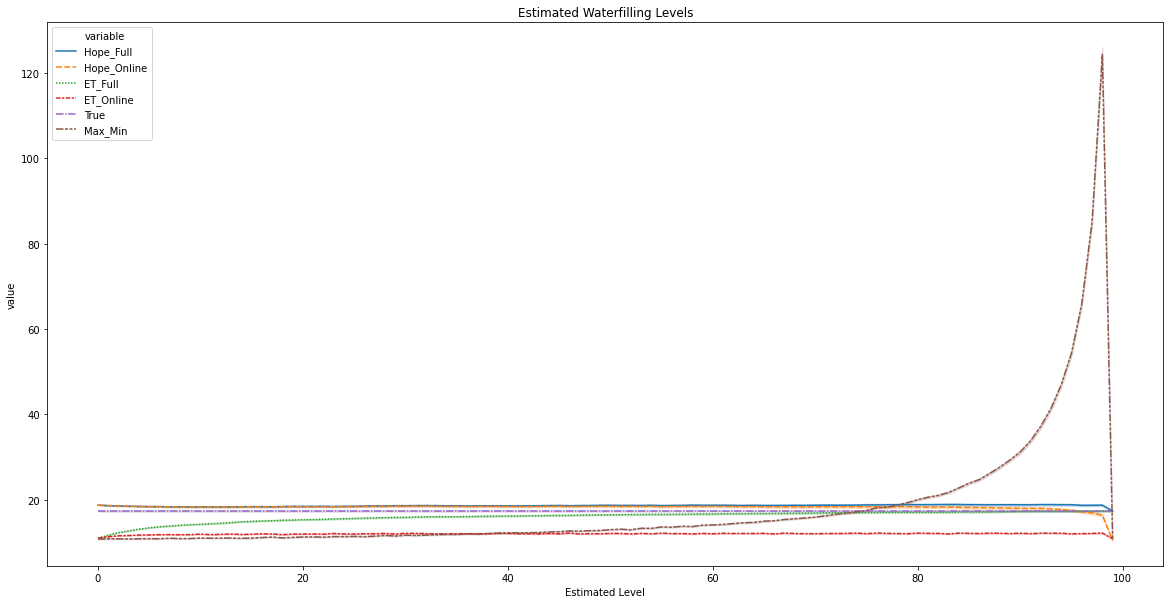

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [40]:
num_iterations = 1000
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [41]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + np.dot(weights, sorted_distribution)
budget = expected_demand*n
score_hope_online = np.zeros((n,num_iterations))
score_hope_full = np.zeros((n,num_iterations))
score_et_online = np.zeros((n,num_iterations))
score_et_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n, num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((9,num_iterations))
po = np.zeros((9,num_iterations))
prop = np.zeros((9,num_iterations))
linf = np.zeros((9,num_iterations))
max_min = np.zeros((9, num_iterations))
l1 = np.zeros((9, num_iterations))

for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    group_median_demands = np.zeros(n) + med
    group_variance = np.zeros(n) + var
    
    
    opt = waterfilling_waste(group_demands,budget)

    hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
    hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
    et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing hope_online
    
    score_hope_online[:,i] = opt - hope_sol
    env[0,i] = max(0,np.amax(envy_utility(hope_sol,group_demands)))
    po[0,i] = excess(hope_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(hope_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(hope_sol, group_demands, budget))
    linf[0,i] = np.amax(np.abs(score_hope_online[:,i]))
    l1[0, i] = np.sum(np.abs(score_hope_online[:,i]))
    
    
    # comparing hope_full
    
    score_hope_full[:,i] = opt - hope_full_sol
    env[1,i] = max(0,np.amax(envy_utility(hope_full_sol,group_demands)))
    po[1,i] = excess(hope_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(hope_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(hope_full_sol, group_demands, budget))
    linf[1,i] = np.amax(np.abs(score_hope_full[:,i]))
    l1[1, i] = np.sum(np.abs(score_hope_full[:,i]))    
    
    # comparing et_online
    
    score_et_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(np.abs(score_et_online[:,i]))
    l1[2, i] = np.sum(np.abs(score_et_online[:,i]))      
    
    # comparing et_full
    
    score_et_full[:,i] = opt - et_full
    env[3,i] = max(0,np.amax(envy_utility(et_full,group_demands)))
    po[3,i] = excess(et_full,budget)
    prop[3,i] = np.amax(proportionality_utility(et_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(et_full, group_demands, budget))
    linf[3,i] = np.amax(np.abs(score_et_full[:,i]))
    l1[3, i] = np.sum(np.abs(score_et_full[:,i]))     
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(np.abs(score_greedy[:,i]))
    l1[4, i] = np.sum(np.abs(score_greedy[:,i]))     
    
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(np.abs(score_fixed_threshold[:,i]))    
    l1[5,i] = np.sum(np.abs(score_fixed_threshold[:,i]))
    
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(np.abs(score_adapt_threshold[:,i]))    
    l1[6,i] = np.sum(np.abs(score_adapt_threshold[:,i]))

    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(np.abs(score_expect_threshold[:,i]))
    l1[7,i] = np.sum(np.abs(score_expect_threshold[:,i]))

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(np.abs(score_max_min[:,i])) 
    l1[8,i] = np.sum(np.abs(score_max_min[:,i]))

In [42]:
score_hope_online = np.average(score_hope_online, axis=1)
score_hope_full = np.average(score_hope_full, axis=1)
score_et_online = np.average(score_et_online, axis=1)
score_et_full = np.average(score_et_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)

env_std = np.std(env, axis=1)
po_std = np.std(po, axis=1)
prop_std = np.std(prop, axis=1)
linf_std = np.std(linf, axis=1)
l1_std = np.std(l1, axis=1)
max_min_std = np.std(max_min, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
max_min = np.average(max_min, axis=1)
l1 = np.average(l1, axis=1)

In [43]:
print(env)

[0.15731091 0.32921086 0.27958628 0.26799439 0.44563958 0.
 0.29809013 0.43480738 0.22649874]


In [44]:
print(po)

[0.15346047 0.13954421 0.22721727 0.23486813 0.12140016 1.24219675
 0.71877015 0.12465808 2.32403357]


In [45]:
print(prop)

[0.0160289  0.26195742 0.         0.08892067 0.41607793 0.
 0.         0.40508126 0.22649874]


In [46]:
print(max_min)

[0.80896541 0.64374215 0.70451295 0.68549629 0.55422131 0.56048126
 0.60585047 0.55119016 0.77350126]


In [47]:
print(linf)

[2.47070811 4.22267083 4.32271566 4.00854594 5.37635433 6.30691088
 5.80179803 5.51335286 3.90432566]


In [48]:
print('hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print(env_std * 1.96 / np.sqrt(num_iterations))
print('po')
print(po)
print(po_std * 1.96 / np.sqrt(num_iterations))
print('prop')
print(prop)
print(prop_std * 1.96 / np.sqrt(num_iterations))
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print(max_min_std * 1.96 / np.sqrt(num_iterations))
print('linf')
print(linf)
print(linf_std * 1.96 / np.sqrt(num_iterations))
print('l1')
print(l1)
print(l1_std * 1.96 / np.sqrt(num_iterations))

hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.15731091 0.32921086 0.27958628 0.26799439 0.44563958 0.
 0.29809013 0.43480738 0.22649874]
[0.00760033 0.02439529 0.00704197 0.01442068 0.02902827 0.
 0.00334831 0.02895645 0.0028496 ]
po
[0.15346047 0.13954421 0.22721727 0.23486813 0.12140016 1.24219675
 0.71877015 0.12465808 2.32403357]
[0.01089989 0.01125949 0.0114748  0.01229322 0.01123463 0.01041302
 0.01183953 0.01135286 0.02973511]
prop
[0.0160289  0.26195742 0.         0.08892067 0.41607793 0.
 0.         0.40508126 0.22649874]
[0.00237639 0.02429536 0.         0.01556916 0.02823827 0.
 0.         0.02810513 0.0028496 ]
sum
[0.32680028 0.73071249 0.50680355 0.59178319 0.98311768 1.24219675
 1.01686028 0.96454672 2.77703104]
max_min
[0.80896541 0.64374215 0.70451295 0.68549629 0.55422131 0.56048126
 0.60585047 0.55119016 0.77350126]
[0.00874626 0.0236968  0.00774625 0.01426519 0.02903204 0.00295357
 0.003

In [49]:
data_dict = {'Agent':group, 'Hope_Online': score_hope_online, 'Hope_Full':score_hope_full, 'ET_Online':score_et_online, 'ET_Full':score_et_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Agent")

In [50]:
df_uniform.columns

Index(['Agent', 'variable', 'value'], dtype='object')

In [51]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5, 0, 'Estimated Level')

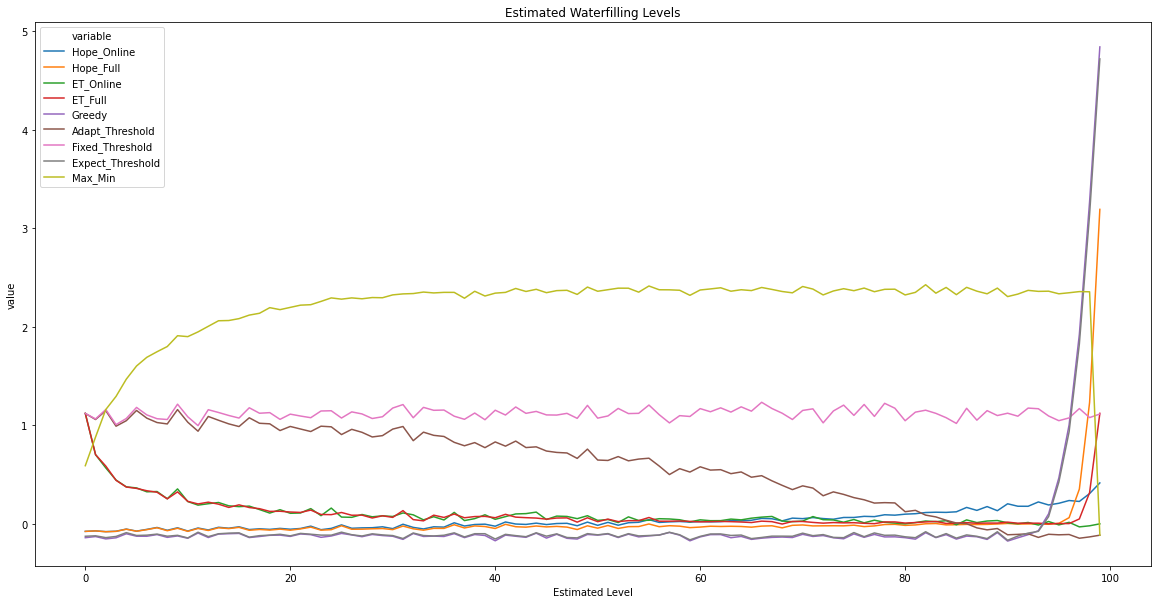

In [52]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Agent', y='value', hue = 'variable', data=df_uniform)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')